<h3>importing numpy and pandas</h3>

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

<h3>importing csv file</h3>

In [2]:
case = pd.read_csv('uk_road_accident.csv')

In [3]:
case

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
case.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h3>cleaning the null values</h3>

In [6]:
case.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
case['Latitude'] = case['Latitude'].fillna(case['Latitude'].mode()[0])

In [8]:
case['Longitude'] = case['Longitude'].fillna(case['Longitude'].mode()[0])

In [9]:
case['Road_Surface_Conditions'] = case['Road_Surface_Conditions'].fillna('unaccounted')

In [10]:
case['Road_Type'] = case['Road_Type'].fillna('unaccounted')

In [11]:
case['Urban_or_Rural_Area'] = case['Urban_or_Rural_Area'].fillna(case['Urban_or_Rural_Area'].mode()[0])

In [12]:
case['Weather_Conditions'] = case['Weather_Conditions'].fillna('unaccounted')

In [13]:
case['Accident Date'] = case['Accident Date'].str.strip()
case['Accident Date'] = case['Accident Date'].astype('str')
case['Accident Date'] = case['Accident Date'].str.replace('/', '-')

<h3>Adjusting date to datetime</h3>

In [14]:
case['Accident Date'] = pd.to_datetime(case['Accident Date'], dayfirst = True, errors = 'coerce')

<h3>Adding columns for Year, Month, Day and Day of Week</h3>

In [15]:
case['Year'] = case['Accident Date'].dt.year
case['Month'] = case['Accident Date'].dt.month
case['Day'] = case['Accident Date'].dt.day
case['DayOfWeek'] = case['Accident Date'].dt.dayofweek

In [16]:
case.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [17]:
case

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h2>EDA</h2>

<H3>1.How does accident severity vary by vehicle type?</H3>

In [18]:
severity_by_vehicle = case.groupby(['Vehicle_Type', 'Accident_Severity']).size()
severity_by_vehicle

Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Fatal                    21
                                       Serious                 282
                                       Slight                 1644
Bus or coach (17 or more pass seats)   Fatal                   325
                                       Serious                3373
                                       Slight                22180
Car                                    Fatal                  6577
                                       Serious               66461
                                       Slight               424954
Data missing or out of range           Slight                    6
Goods 7.5 tonnes mgw and over          Fatal                   216
                                       Serious                2321
                                       Slight                14770
Goods over 3.5t. and under 7.5t        Fatal                    67
     

<h3>Insight 1</h3>
<h3>Cars are most often involved in fatal accidents. Heavy vehicles and large motorcycles also appear often.</h3>
<hr>
<br>

<H3>2.Are car accidents in Urban more likely to cause injuries than in the Rural?</H3>

In [19]:
car_df = case[case['Vehicle_Type'] == 'Car']
urban_rural = car_df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].size()
urban_rural

Urban_or_Rural_Area
Rural          181922
Unallocated         8
Urban          316062
Name: Number_of_Casualties, dtype: int64

<h3>Insight 2</h3>
<h3>This suggests that urban areas have a significantly higher number of car accident casualties compared to rural areas.</h3>
<hr>
<br>

<H3>3.In what district area has the highest car fatal accidents?</H3>

In [20]:
car_area_severity = car_df[car_df['Accident_Severity'] == 'Fatal']['District Area']
fatal_counts = car_area_severity.value_counts()

area_highest_fatal = fatal_counts.idxmax()
fatal_count = fatal_counts.max()

area_highest_fatal, fatal_count

('Birmingham', np.int64(77))

<h3>Insight 3</h3>
<h3>The district with the highest number of fatal accidents is Birmingham with 77 fatal accidents.
</h3>
<hr>
<br>

<H3>4.Is there a correlation between Number of Casualties and Number of Vehicles ?</H3>

In [21]:
casualties_vehicles_corr = case['Number_of_Casualties'].corr(case['Number_of_Vehicles'])
casualties_vehicles_corr

np.float64(0.2288888612692756)

<h3>Insight 4</h3>
<h3>Having 0.228, we can say that there are no correlation between Number of Casualties to Number of Vehicles.</h3>
<hr>
<br>

<H3>5.How many car accidents by light condition?</H3>

In [22]:
car_light = car_df.groupby('Light_Conditions')['Accident_Severity'].count()
car_light

Light_Conditions
Darkness - lighting unknown      4914
Darkness - lights lit           96994
Darkness - lights unlit          1933
Darkness - no lighting          28385
Daylight                       365766
Name: Accident_Severity, dtype: int64

<h3>Insight 5</h3>
<h3>Most car accidents happen in daylight, but a large number also occur at night with street lights.</h3>
<hr>
<br>

<H3>6.Where are car accidents most common by road surface condition?</H3>

In [23]:
car_surface = car_df.groupby('Road_Surface_Conditions')['Accident_Severity'].count()
car_surface

Road_Surface_Conditions
Dry                     337311
Flood over 3cm. deep       777
Frost or ice             14108
Snow                      4483
Wet or damp             140764
unaccounted                549
Name: Accident_Severity, dtype: int64

<h3>Insight 6</h3>
<h3>Most accidents happen on dry roads. This may be because dry roads are used more often, not because they are less safe.</h3>
<hr>
<br>

<H3>7.What is the common accident severity across all vehicles?</H3>

In [24]:
severity_all = case['Accident_Severity'].value_counts()
severity_all

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insight 7</h3>
<h3>Most accidents for all vehicles are slight. Fatal accidents are rare.</h3>
<hr>
<br>

<H3>8.Which vehicle types have the most casualties per fatal accident (on average)?</H3>

In [25]:
fatal_df = case[case['Accident_Severity'] == 'Fatal']
fatal_casualties = fatal_df.groupby('Vehicle_Type')['Number_of_Casualties'].mean().round(2)
fatal_casualties

Vehicle_Type
Agricultural vehicle                     1.76
Bus or coach (17 or more pass seats)     2.10
Car                                      1.89
Goods 7.5 tonnes mgw and over            1.88
Goods over 3.5t. and under 7.5t          2.16
Minibus (8 - 16 passenger seats)         2.52
Motorcycle 125cc and under               1.77
Motorcycle 50cc and under                1.73
Motorcycle over 125cc and up to 500cc    1.81
Motorcycle over 500cc                    1.79
Other vehicle                            1.66
Pedal cycle                              1.67
Taxi/Private hire car                    1.99
Van / Goods 3.5 tonnes mgw or under      2.07
Name: Number_of_Casualties, dtype: float64

<h3>Insight 8</h3>
<h3>Buses and minibuses usually have more casualties per fatal crash because they carry more passengers.</h3>
<hr>
<br>

<H3>9.Which weather conditions have the most fatal accidents?</H3>

In [26]:
fatal_weather = fatal_df['Weather_Conditions'].value_counts()
fatal_weather

Weather_Conditions
Fine no high winds       7100
Raining no high winds     848
Fine + high winds         175
Other                     165
Raining + high winds      145
unaccounted               107
Fog or mist                82
Snowing no high winds      36
Snowing + high winds        3
Name: count, dtype: int64

<h3>Insight 9</h3>
<h3>Most fatal accidents happen in clear weather.</h3>
<hr>
<br>

<h3>importing f_oneway from scipy library</h3>

In [27]:
from scipy.stats import f_oneway

<H3>10.Is there a correlation between Number of Casualties and Road Type?</H3>

In [28]:
case['Road_Type'].unique()

array(['Single carriageway', 'unaccounted', 'Dual carriageway',
       'One way street', 'Roundabout', 'Slip road'], dtype=object)

In [29]:
single_type = case[case['Road_Type'] == 'Single carriageway']['Number_of_Casualties']
dual_type = case[case['Road_Type'] == 'Dual carriageway']['Number_of_Casualties']
oneway_type = case[case['Road_Type'] == 'One way street']['Number_of_Casualties']
round_type = case[case['Road_Type'] == 'Roundabout']['Number_of_Casualties']
slip_type = case[case['Road_Type'] == 'Slip road']['Number_of_Casualties']

In [30]:
res, corr_casualties_roadT = f_oneway(single_type,dual_type,oneway_type,round_type,slip_type)
corr_casualties_roadT

np.float64(0.0)

<h3>Insight 10</h3>
<h3>Having the 0.0 in the pvalue, we can say that there are no correlation between Number of Casualties and Road Types.</h3>
<hr>
<br>

<H3>11.Is there a correlation between Road Surface Conditions and Number of Casualties in Serious Accidents?</H3>

In [31]:
serious_df = case[case['Accident_Severity'] == 'Serious']

serious_dry = serious_df[serious_df['Road_Surface_Conditions'] == 'Dry']['Number_of_Casualties']
serious_wet = serious_df[serious_df['Road_Surface_Conditions'] == 'Wet or damp']['Number_of_Casualties']
serious_ice = serious_df[serious_df['Road_Surface_Conditions'] == 'Frost or ice']['Number_of_Casualties']
serious_snow = serious_df[serious_df['Road_Surface_Conditions'] == 'Snow']['Number_of_Casualties']

res, surface_casualties = f_oneway(serious_dry, serious_wet, serious_ice, serious_snow)
surface_casualties

np.float64(1.6220067365548889e-80)

<h3>Insight 11</h3>
<h3>Data shows pvalue is equal to 1.62, which means there are correlations between road surface conditions and Number of casualties in Serious accidents.</h3>
<hr>
<br>

<H3>12.Which weather conditions have the most Motorcycle over 500cc accidents?</H3>

In [32]:
motorcycle500_df = case[case['Vehicle_Type'] == 'Motorcycle over 500cc']
moto_by_weather = motorcycle500_df['Weather_Conditions'].value_counts()
moto_by_weather

Weather_Conditions
Fine no high winds       20245
Raining no high winds     3135
Other                      655
unaccounted                548
Raining + high winds       354
Fine + high winds          315
Snowing no high winds      254
Fog or mist                118
Snowing + high winds        33
Name: count, dtype: int64

<h3>Insight 12</h3>
<h3>Most motorcycle over 500cc accidents happen in clear weather, not bad weather.</h3>
<hr>
<br>

<H3>13.Is there a correlation between the number of vehicles and the number of casualties in Pedal cycle accidents?</H3>

In [33]:
pedal_df = case[case['Vehicle_Type'] == 'Pedal cycle']
pedal_corr = pedal_df['Number_of_Vehicles'].corr(pedal_df['Number_of_Casualties'])
pedal_corr

np.float64(0.2648831726875072)

<h3>Insight 13</h3>
<h3>There are no correlation between number of casualties and number of vehicle in pedal cycle.</h3>
<hr>
<br>

<H3>14.What is the average number of casualties in pedal cycle accidents by road type?</H3>

In [34]:
pedal_casualties_roadT = pedal_df.groupby('Road_Type')['Number_of_Casualties'].mean().round(1)
pedal_casualties_roadT

Road_Type
Dual carriageway      1.6
One way street        1.2
Roundabout            1.2
Single carriageway    1.3
Slip road             1.5
unaccounted           1.5
Name: Number_of_Casualties, dtype: float64

<h3>Insight 14</h3>
<h3>Dual carriageways tend to have slightly higher casualties for pedal cycle accidents compared to other roads.</h3>
<hr>
<br>

<H3>15.What is the average number of casualties in pedal cycle accidents by severity?</H3>

In [35]:
pedal_avg_casualties = pedal_df.groupby('Accident_Severity')['Number_of_Casualties'].mean().round(2)
pedal_avg_casualties

Accident_Severity
Fatal      1.67
Serious    1.26
Slight     1.39
Name: Number_of_Casualties, dtype: float64

<h3>Insight 15</h3>
<h3>Fatal accidents usually involve more casualties per crash compared to slight accidents.</h3>
<hr>
<br>

<H3>16.On which road surfaces do ridden horse accidents happen most?</H3>

In [36]:
ridden_horse_df = case[case['Vehicle_Type'] == 'Ridden horse']

horse_surface = ridden_horse_df.groupby('Road_Surface_Conditions')['Index'].count()
horse_surface


Road_Surface_Conditions
Dry            3
Wet or damp    1
Name: Index, dtype: int64

<h3>Insight 16</h3>
<h3>Most ridden horse accidents happen on dry roads.</h3>
<hr>
<br>

<H3>17.In which districts do ridden horse accidents happen most?</H3>

In [37]:
horse_districts = ridden_horse_df.groupby('District Area')['Index'].count()
horse_districts


District Area
Cardiff         1
Knowsley        1
Norwich         1
West Lothian    1
Name: Index, dtype: int64

<h3>Insight 17</h3>
<h3>Based on the district areas with ridden horse accidents, the cases are evenly spread, with each district having 1 accident.</h3>
<hr>
<br>

<H3>18.What is the average number of casualties in horse accidents by road type?</H3>

In [38]:
horse_casualties_road = ridden_horse_df.groupby('Road_Type')['Number_of_Casualties'].mean()
horse_casualties_road


Road_Type
Single carriageway    1.25
Name: Number_of_Casualties, dtype: float64

<h3>Insight 18</h3>
<h3>Most ridden horse accidents happen on single carriageways, it has an averange of 1.25.</h3>
<hr>
<br>

<H3>19.What is the average number of casualties per accident in urban vs rural areas?</H3>

In [39]:
urban_rural_casualties = case.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean().round(2)
urban_rural_casualties


Urban_or_Rural_Area
Rural          1.48
Unallocated    1.18
Urban          1.29
Name: Number_of_Casualties, dtype: float64

<h3>Insight 19</h3>
<h3>Rural accidents tend to have slightly more casualties per crash compared to unallocated and urban, even though more accidents happen in cities.</h3>
<hr>
<br>

<H3>20.Which road type has the highest number of accidents?</H3>

In [40]:
case['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h3>Insight 20</h3>
<h3>Most accidents happen on single carriageways, far more than any other road type.</h3>
<hr>
<br>

<h2>ABOUT DATES</h2>

In [41]:
case

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h3>21.What year has the highest fatal accident severity?</h3>

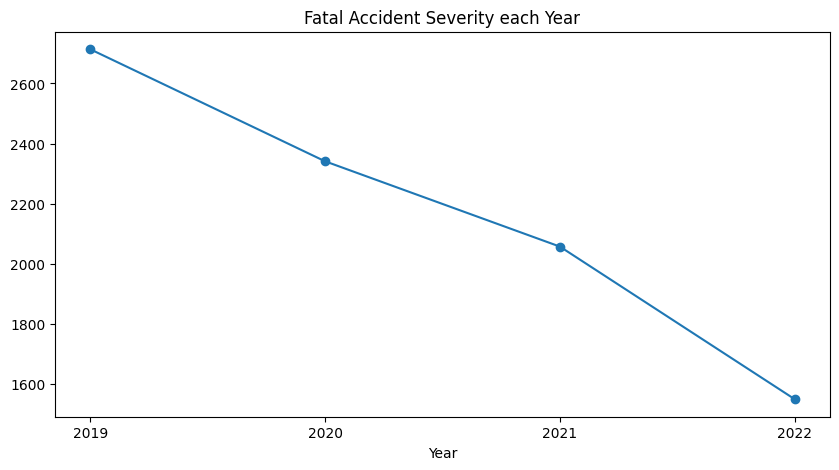

In [42]:
fatal_df = case[case['Accident_Severity'] == 'Fatal']
year_fatal = fatal_df.groupby('Year').size()
year_fatal.plot(marker='o',figsize=(10,5), title='Fatal Accident Severity each Year')
plt.xticks(range(2019, 2023))
plt.show()

<h3>Insight 21</h3>
<h3>The decrease in fatal cases over the years might be attributed to much better road safety.</h3>
<hr>
<br>

<h3>22.Which Month has the highest fatal cases over the years?</h3>

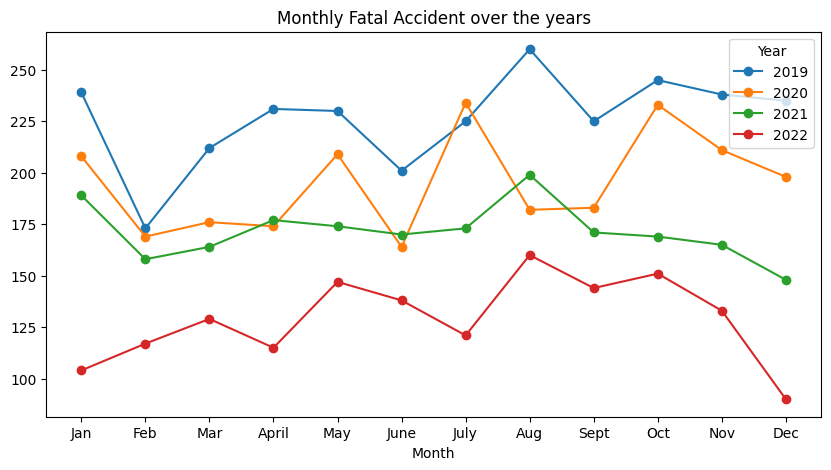

In [43]:
month_fatal = fatal_df.groupby(['Year','Month'])['Index'].count()
month_fatal=month_fatal.unstack(level=0)
month_fatal.plot(marker='o',figsize=(10,5), title='Monthly Fatal Accident over the years')
plt.xticks(range(1,13),['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.show()

<h3>Insight 22</h3>
<h3>Fatal accidents peaked in August 2019 with 260 cases, but the overall trend shows a decrease in fatal accidents from 2020 to 2022, with the lowest count in December 2022 at 90 cases.</h3>
<hr>
<br>

<h3>23.Which Day of the week has the highest fatal cases?</h3>

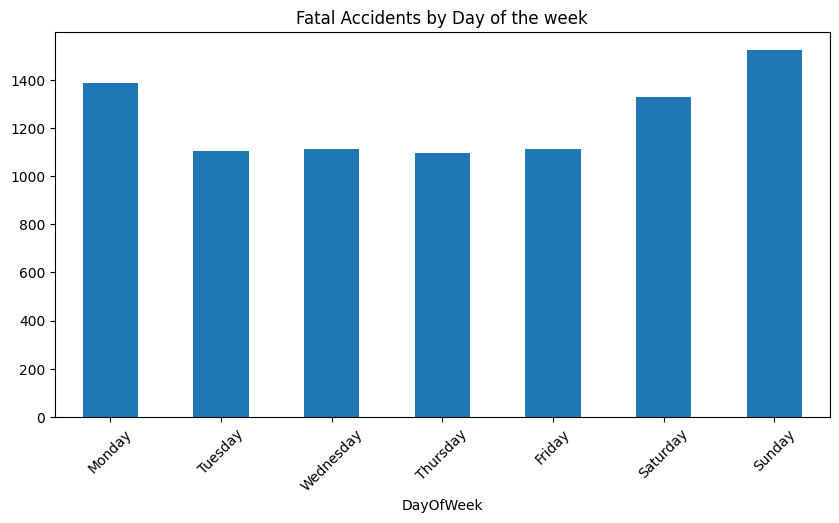

In [44]:
day_fatal = fatal_df.groupby('DayOfWeek')['Index'].count()
day_fatal.plot(kind='bar',figsize=(10,5),title='Fatal Accidents by Day of the week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

<h3>Insight 23</h3>
<h3>Fatal accidents are highest on Sundays, likely due to increased weekend travel and riskier driving behaviors, while weekdays show more moderate numbers.</h3>
<hr>
<br>

<h3>24.Which Day of the Month has the highest fatal cases?</h3>

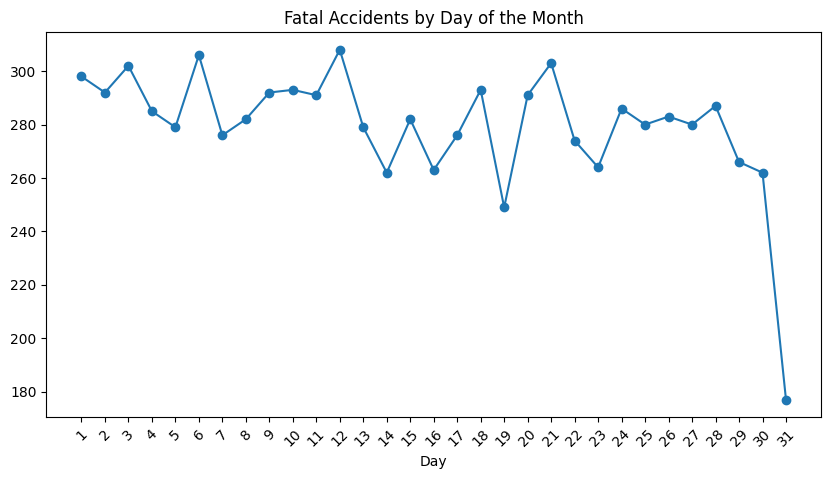

In [45]:
day_of_month_fatal = fatal_df.groupby('Day')['Index'].count()
day_of_month_fatal.plot(marker='o',figsize=(10,5), title='Fatal Accidents by Day of the Month')
plt.xticks(range(1, 32),[str(i) for i in range(1, 32)], rotation=45)
plt.show()

<h3>Insight 24</h3>
<h3>Fatal accidents are relatively consistent throughout the month, with peaks on Days 3, 6, and 12, and the lowest number on Day 31.</h3>
<hr>
<br>

<h3>25.Which district area has the highest number of fatal cases, and how many fatal cases occurred by year?</h3>

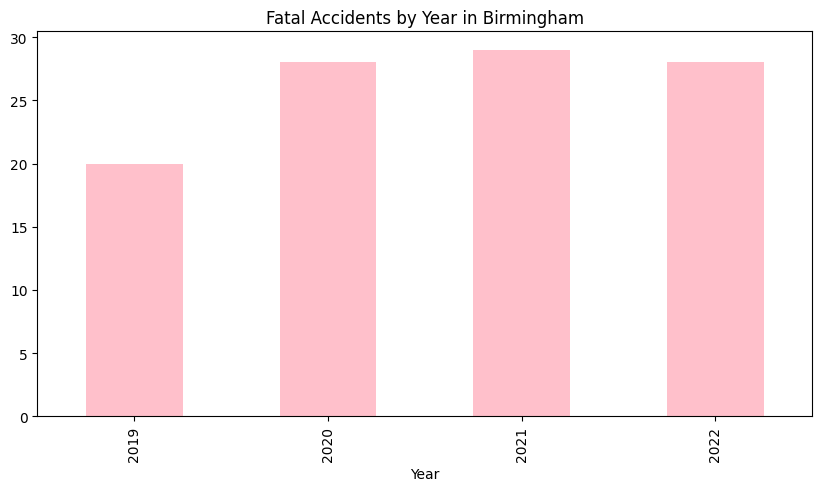

In [46]:
district = fatal_df.groupby('District Area')['Index'].size()
high_fatal_district = district.idxmax()
birmingham_fatal_df = fatal_df[fatal_df['District Area'] == high_fatal_district]
year_fatal_birmingham = birmingham_fatal_df.groupby('Year')['Index'].count()
year_fatal_birmingham.plot(kind='bar',figsize=(10,5),title=f'Fatal Accidents by Year in {high_fatal_district}',color='pink')
plt.show()

<h3>Insight 25</h3>
<h3>Bar chart indicates that fatal accidents in Birmingham were fairly stable across the years 2019 to 2022, with slightly similar numbers each year.</h3>
<hr>
<br>

<h2>Creating Dataframe for districts.</h2>

<h2>Vale Royal District</h2>

<img src="https://cdn.britannica.com/69/115669-004-A084FBDD.jpg">

In [48]:
vale_royal_df = case[case['District Area'] == 'Vale Royal']

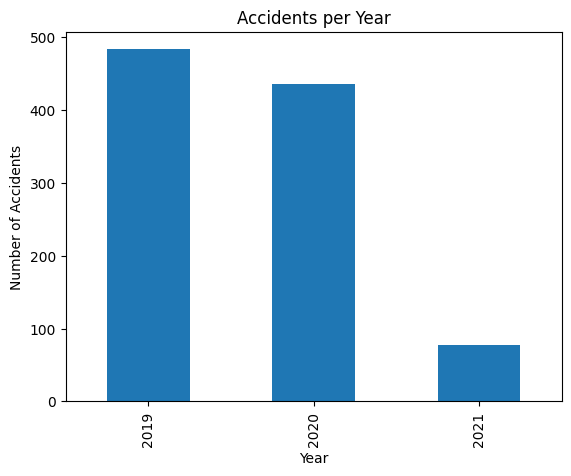

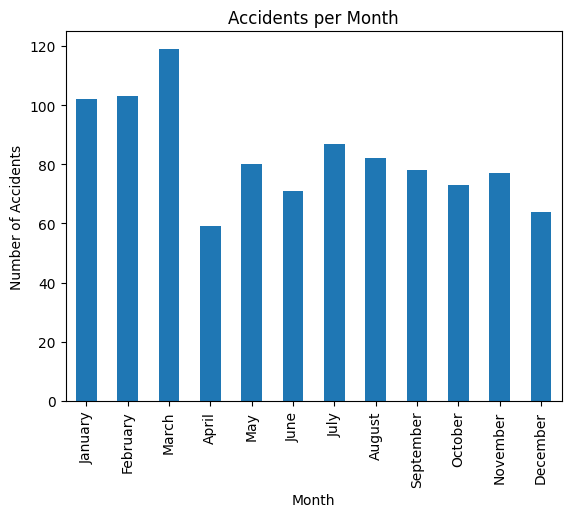

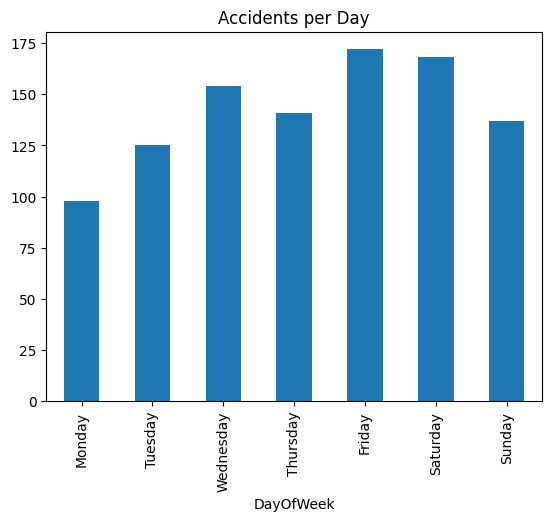

DayOfWeek
Monday        98
Tuesday      125
Wednesday    154
Thursday     141
Friday       172
Saturday     168
Sunday       137
Name: count, dtype: int64


In [49]:
# Accidents per year
accidents_per_year = vale_royal_df['Year'].value_counts().sort_index()
accidents_per_month = vale_royal_df['Month'].value_counts().sort_index()
accidents_per_day = vale_royal_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.show()
print(accidents_per_day)

<h3>Insight 26</h3>
<h3>In the Accidents per Year data, 2019 recorded the highest number of reported accidents in Vale Royal.</h3>
<hr>

<h3>Insight 27</h3>
<h3>In the Accidents per Month analysis, March was the busiest month for accidents, while April recorded the lowest number.</h3>
<hr>

<h3>Insight 28</h3>
<h3>Based on Accidents per Day, weekends and late-week days (Friday and Saturday) are the riskiest, while weekdays see a more stable but slightly lower accident rate.</h3>
<hr>


<h3>Accidents Severity in Vale Royal</h3>

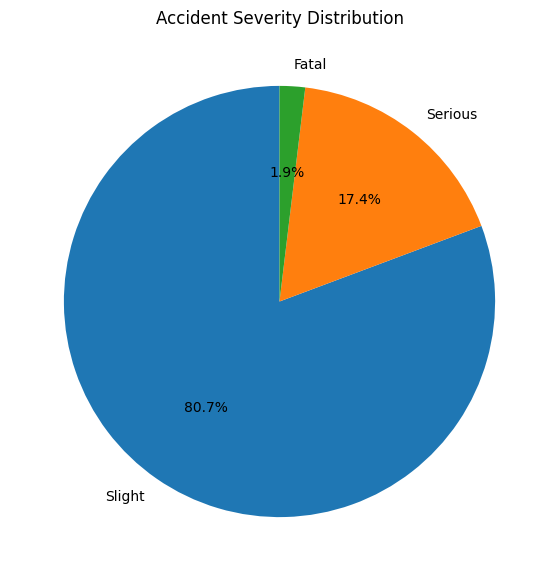

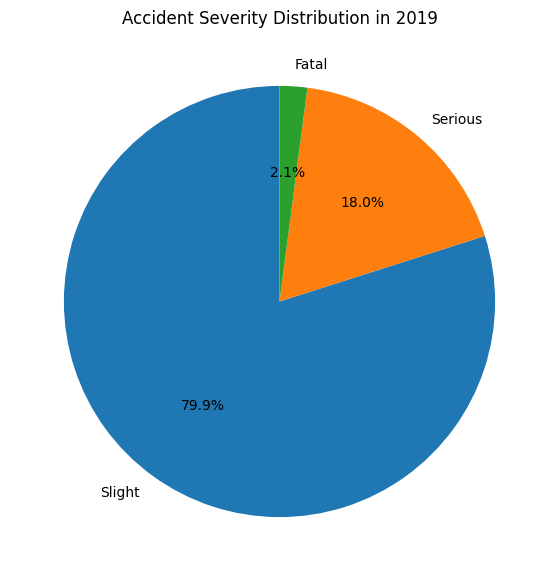

In [50]:
severity_vale_royal  = vale_royal_df['Accident_Severity'].value_counts()

plt.pie(severity_vale_royal,
        labels = severity_vale_royal.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_vale = vale_royal_df[vale_royal_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_vale['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in 2019')
plt.show()

<h3>Insight 29</h3>
<h3>The proportion of "Serious" and "Fatal" accidents slightly increased in 2019 compared to the overall distribution.</h3>
<hr>

In [54]:
# Step 1: Extract latitude and longitude from the DataFrame
locations = list(zip(vale_royal_df['Latitude'], vale_royal_df['Longitude']))

# Step 2: Create a base map centered on a specific location
m = folium.Map(location=[vale_royal_df['Latitude'].mean(), vale_royal_df['Longitude'].mean()], zoom_start=10)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m

<h3>Insight 30</h3>
<h3>Most accidents happen in busy central areas like Rudheath, Northwich, and Winsford. But there are also some accident hotspots farther away, such as in Farndon and on roads like the A41 and B5395.</h3>
<hr>
<br>

<h2>Warwick District</h2>

<img src="https://www.visitwarwick.co.uk/wp-content/uploads/2022/02/StMarysChurch.jpg">

In [51]:
warwick_df = case[case['District Area'] == 'Warwick']

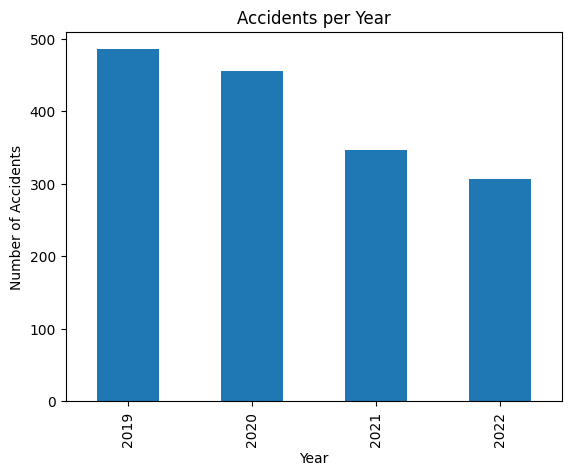

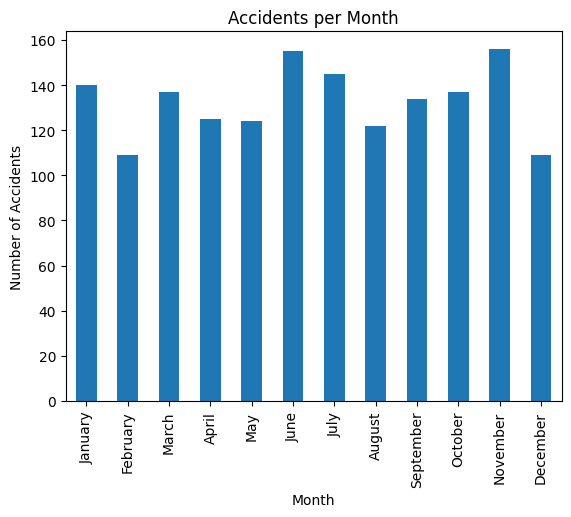

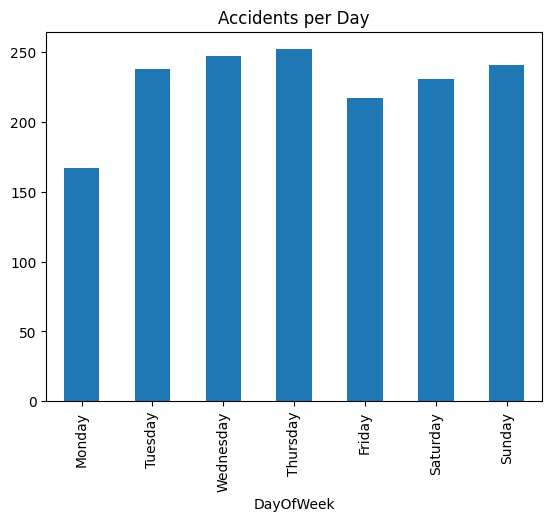

DayOfWeek
Monday       167
Tuesday      238
Wednesday    247
Thursday     252
Friday       217
Saturday     231
Sunday       241
Name: count, dtype: int64


In [52]:
# Accidents per year
accidents_per_year = warwick_df['Year'].value_counts().sort_index()
accidents_per_month = warwick_df['Month'].value_counts().sort_index()
accidents_per_day = warwick_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.show()
print(accidents_per_day)

<h3>Insight 31</h3>
<h3>The number of accidents is going down each year, but within a year, they tend to increase in June and November and are most common in the middle of the week, especially on Thursdays.</h3>
<hr>
<br>

<h3>Accidents Severity in Warwick</h3>

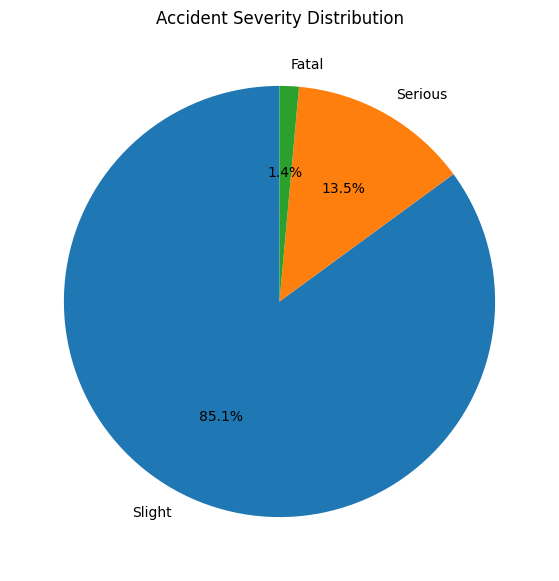

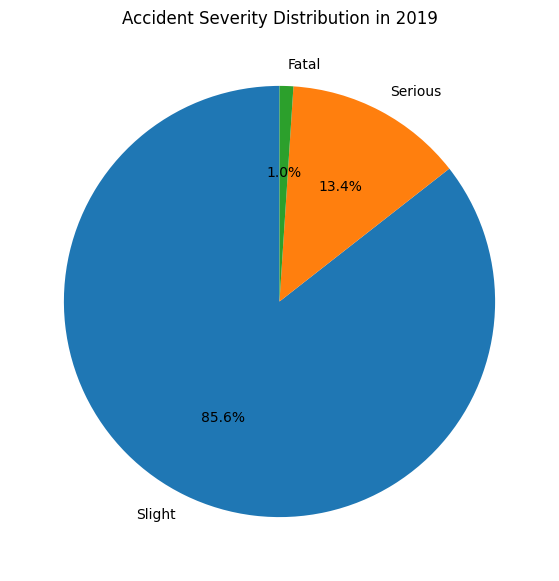

In [53]:
severity_warwick  = warwick_df['Accident_Severity'].value_counts()

plt.pie(severity_warwick,
        labels = severity_warwick.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_vale = warwick_df[warwick_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_vale['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in 2019')
plt.show()

<h3>Insight 32</h3>
<h3>Most accidents are minor, and the share of serious or fatal accidents did not change much in 2019.</h3>
<hr>
<br>

In [59]:
# Step 1: Extract latitude and longitude from the DataFrame
locations = list(zip(warwick_df['Latitude'], warwick_df['Longitude']))

# Step 2: Create a base map centered on a specific location
m = folium.Map(location=[warwick_df['Latitude'].mean(), warwick_df['Longitude'].mean()], zoom_start=11)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m

<h3>Insight 33</h3>
<h3>Most accidents happen in busy central areas like Leamington Spa (Sydenham, town center, Myton Park and Warwick town center.</h3>
<hr>
<br>